In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Project – Analyzing the trends of COVID-19 with Python

Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
of rate of infection and recovery as well as make predictions about the number of cases
expected a week in future based on the current trends

Guidelines:
• Use pandas to accumulate data from multiple data files
• Use plotly (visualization library) to create interactive visualizations
• Use Facebook prophet library to make time series models
• Visualize the prediction by combining these technologies

In [ ]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px #chloropleth
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load the data
data = pd.read_csv("drive/MyDrive/covid_19_clean_complete.csv", parse_dates=['Date'])

In [ ]:
data.head(5)

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Gives the information about data type and total non null values in each column of a given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#Renaming the columns
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [ ]:
# Extracting last 5 rows of a dataset
data.tail(5)

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
# Tells us about the how many times the given unique values occurs
data['date'].value_counts()

2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: date, Length: 188, dtype: int64

In [ ]:
#To find all the cases on last day of month
top = data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
#Make a dataframe of confirmed,active and death cases of the repective countries.
w = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
w

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [ ]:
#choropleth - A choropleth map is a thematic map that is used to represent statistical data
#using the color mapping symbology technique.

fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

In [ ]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='deaths',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="viridis",title='Death cases Countries')
fig.show()

Text(0, 0.5, 'Cases total')

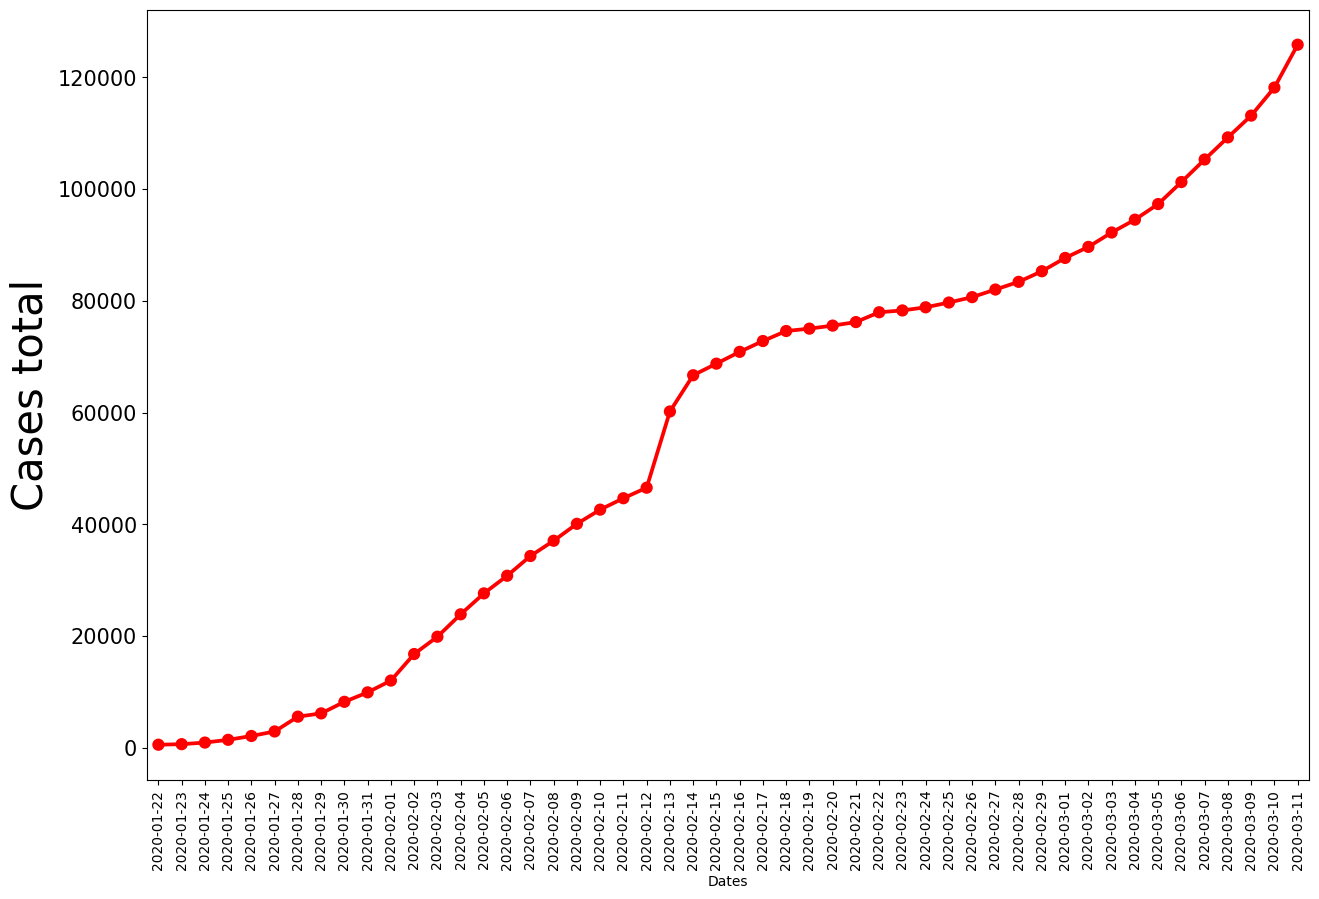

In [ ]:
#plot for confirmed cases
plt.figure(figsize=(15,10))

t_cases = data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date'] = pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date.head(50),y=t_cases.confirmed.head(50),color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

In [ ]:
#Top 20 countries having most active cases

In [ ]:
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
t_actives=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Countryl')

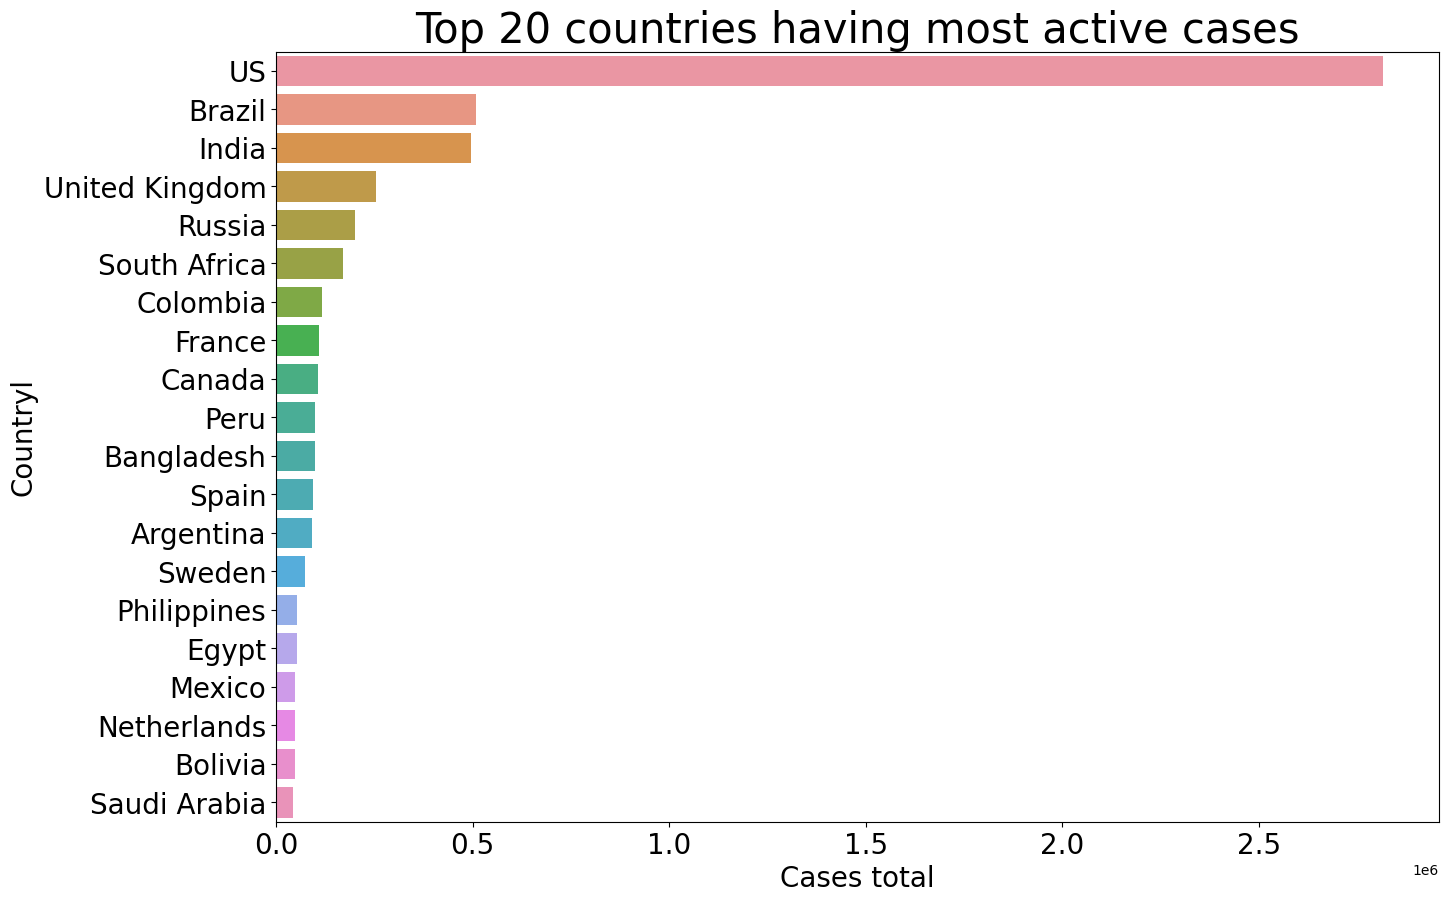

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
#barplot
a=sns.barplot(x=t_actives.active,y=t_actives.country)

a.set(xlabel='Cases total',ylabel='Country')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)

In [ ]:
#Top 20 countries having most deaths
#top - df

In [ ]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [ ]:
#Fb Prophet

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [ ]:
confirmed = data.groupby('date')['confirmed'].sum().reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [ ]:
from prophet import Prophet
import pandas as pd

In [ ]:
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:

m = Prophet() #interval_width=0.95
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoj5tz1u/mye508c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoj5tz1u/kac77kj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51443', 'data', 'file=/tmp/tmpjoj5tz1u/mye508c0.json', 'init=/tmp/tmpjoj5tz1u/kac77kj4.json', 'output', 'file=/tmp/tmpjoj5tz1u/prophet_model6hs9ctk1/prophet_model-20231207064705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=7,freq='D')
future.tail(12)

,ds
183,2020-07-23
184,2020-07-24
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01


In [ ]:
#m.predict()
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.067684e+04,-1.264950e+05,8.133469e+04
1,2020-01-23,-8.050948e+03,-1.103174e+05,1.019587e+05
2,2020-01-24,5.827455e+03,-1.050267e+05,1.093865e+05
3,2020-01-25,1.217668e+04,-9.031273e+04,1.212153e+05
4,2020-01-26,8.405020e+03,-1.002276e+05,1.093688e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.664983e+07,1.685291e+07
191,2020-07-31,1.695910e+07,1.684995e+07,1.706379e+07
192,2020-08-01,1.716676e+07,1.705064e+07,1.728339e+07
193,2020-08-02,1.736430e+07,1.725119e+07,1.747380e+07


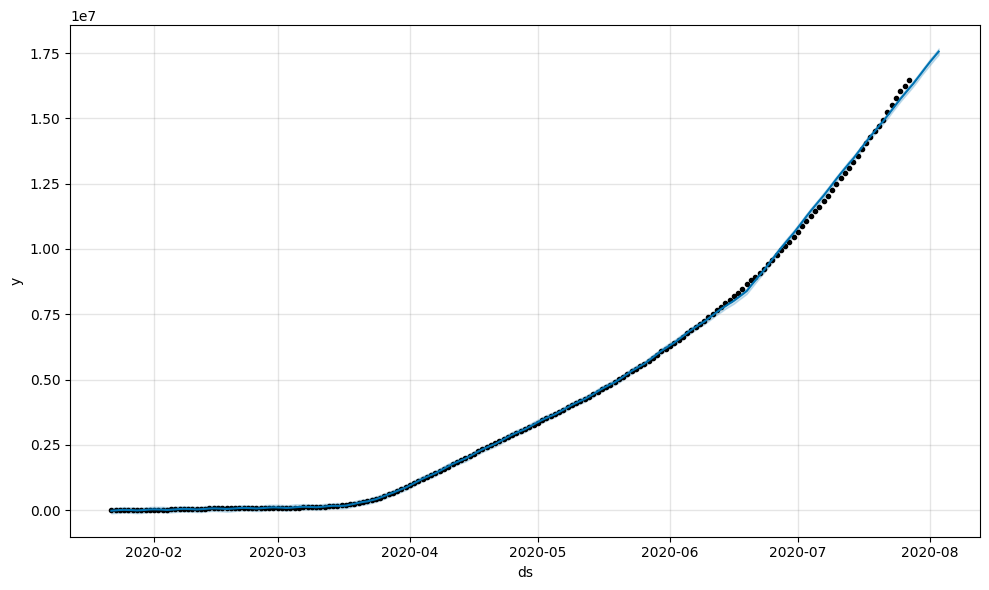

In [ ]:
confirmed_cases_forecast = m.plot(forecast)

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)

In [ ]:
forecast[['ds','yhat']].tail(12)

,ds,yhat
183,2020-07-23,15315975
184,2020-07-24,15531164
185,2020-07-25,15738824
186,2020-07-26,15936363
187,2020-07-27,16130952
188,2020-07-28,16320199
189,2020-07-29,16529972
190,2020-07-30,16743908
191,2020-07-31,16959097
192,2020-08-01,17166757


#Forecast on Death cases

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoj5tz1u/clbhid39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjoj5tz1u/_6cq7mze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97552', 'data', 'file=/tmp/tmpjoj5tz1u/clbhid39.json', 'init=/tmp/tmpjoj5tz1u/_6cq7mze.json', 'output', 'file=/tmp/tmpjoj5tz1u/prophet_model4i9ltn_e/prophet_model-20231207064706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,733903.099575,726390.204732,742793.648449
205,2020-08-14,739418.098237,731299.984722,749300.339126
206,2020-08-15,744300.130882,735317.389624,755775.184646
207,2020-08-16,748437.048945,738519.572336,760612.407595
208,2020-08-17,752727.363324,741221.635214,766400.791385


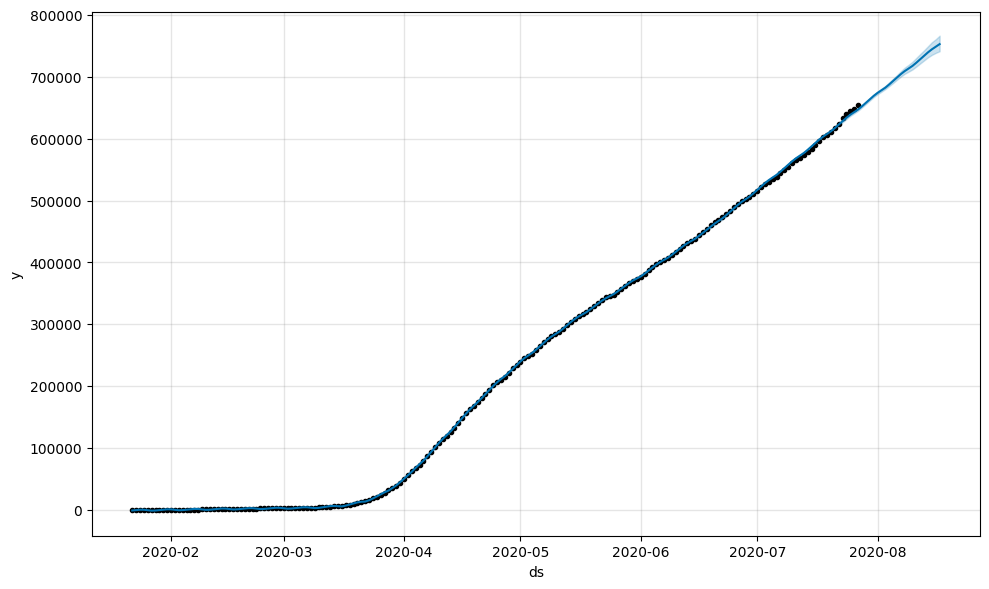

In [ ]:
deaths_forecast_plot = m.plot(forecast)

In [ ]:
forecast['yhat'] = forecast['yhat'].astype(int)

In [ ]:
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,633800
185,2020-07-25,638682
186,2020-07-26,642819
187,2020-07-27,647109
188,2020-07-28,652315
189,2020-07-29,657882
190,2020-07-30,663491
191,2020-07-31,669006
192,2020-08-01,673888
193,2020-08-02,678025
